In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [3]:
# From Covid Tracking API
# https://covidtracking.com/api/
# Getting sporadic 403 errors when attempting to read URLs directly
# in Pandas so downloading files locally first
api_us = 'https://covidtracking.com/api/us/daily'
api_states = 'https://covidtracking.com/api/states/daily'

f_us = 'data/api_us.json'
f_states = 'data/api_states.json'

In [4]:
r = requests.get(api_us, allow_redirects=True)
open(f_us, 'wb').write(r.content)

r = requests.get(api_states, allow_redirects=True)
open(f_states, 'wb').write(r.content)

101675

In [5]:
df_us = pd.read_json(f_us)
df_states = pd.read_json(f_states)

In [6]:
df_us.shape

(16, 8)

In [7]:
df_states.shape

(757, 8)

In [8]:
df_us.tail()

,date,states,positive,negative,posNeg,pending,death,total
11,20200315,51,3173,22548,25721,2242,60.0,27963
12,20200316,56,4019,36104,40123,1691,71.0,41714
13,20200317,56,5723,47604,53327,1687,90.0,54957
14,20200318,56,7731,66225,73956,2538,112.0,76495
15,20200319,56,11723,89119,100842,3025,160.0,103867


In [9]:
df_states.tail()

,date,state,positive,negative,pending,death,total,dateChecked
752,20200304,OR,3,29.0,18.0,NaN,50,2020-03-04T21:00:00Z
753,20200304,SC,0,5.0,0.0,NaN,5,2020-03-04T21:00:00Z
754,20200304,TX,1,NaN,NaN,NaN,1,2020-03-04T21:00:00Z
755,20200304,WA,39,NaN,NaN,NaN,39,2020-03-04T21:00:00Z
756,20200304,WI,1,19.0,6.0,NaN,26,2020-03-04T21:00:00Z


In [10]:
df_us['date'] = df_us['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_states['date'] = df_states['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

# United States Positive Cases

(array([737489., 737491., 737493., 737495., 737497., 737499., 737501.,
        737503.]),
 <a list of 8 Text xticklabel objects>)

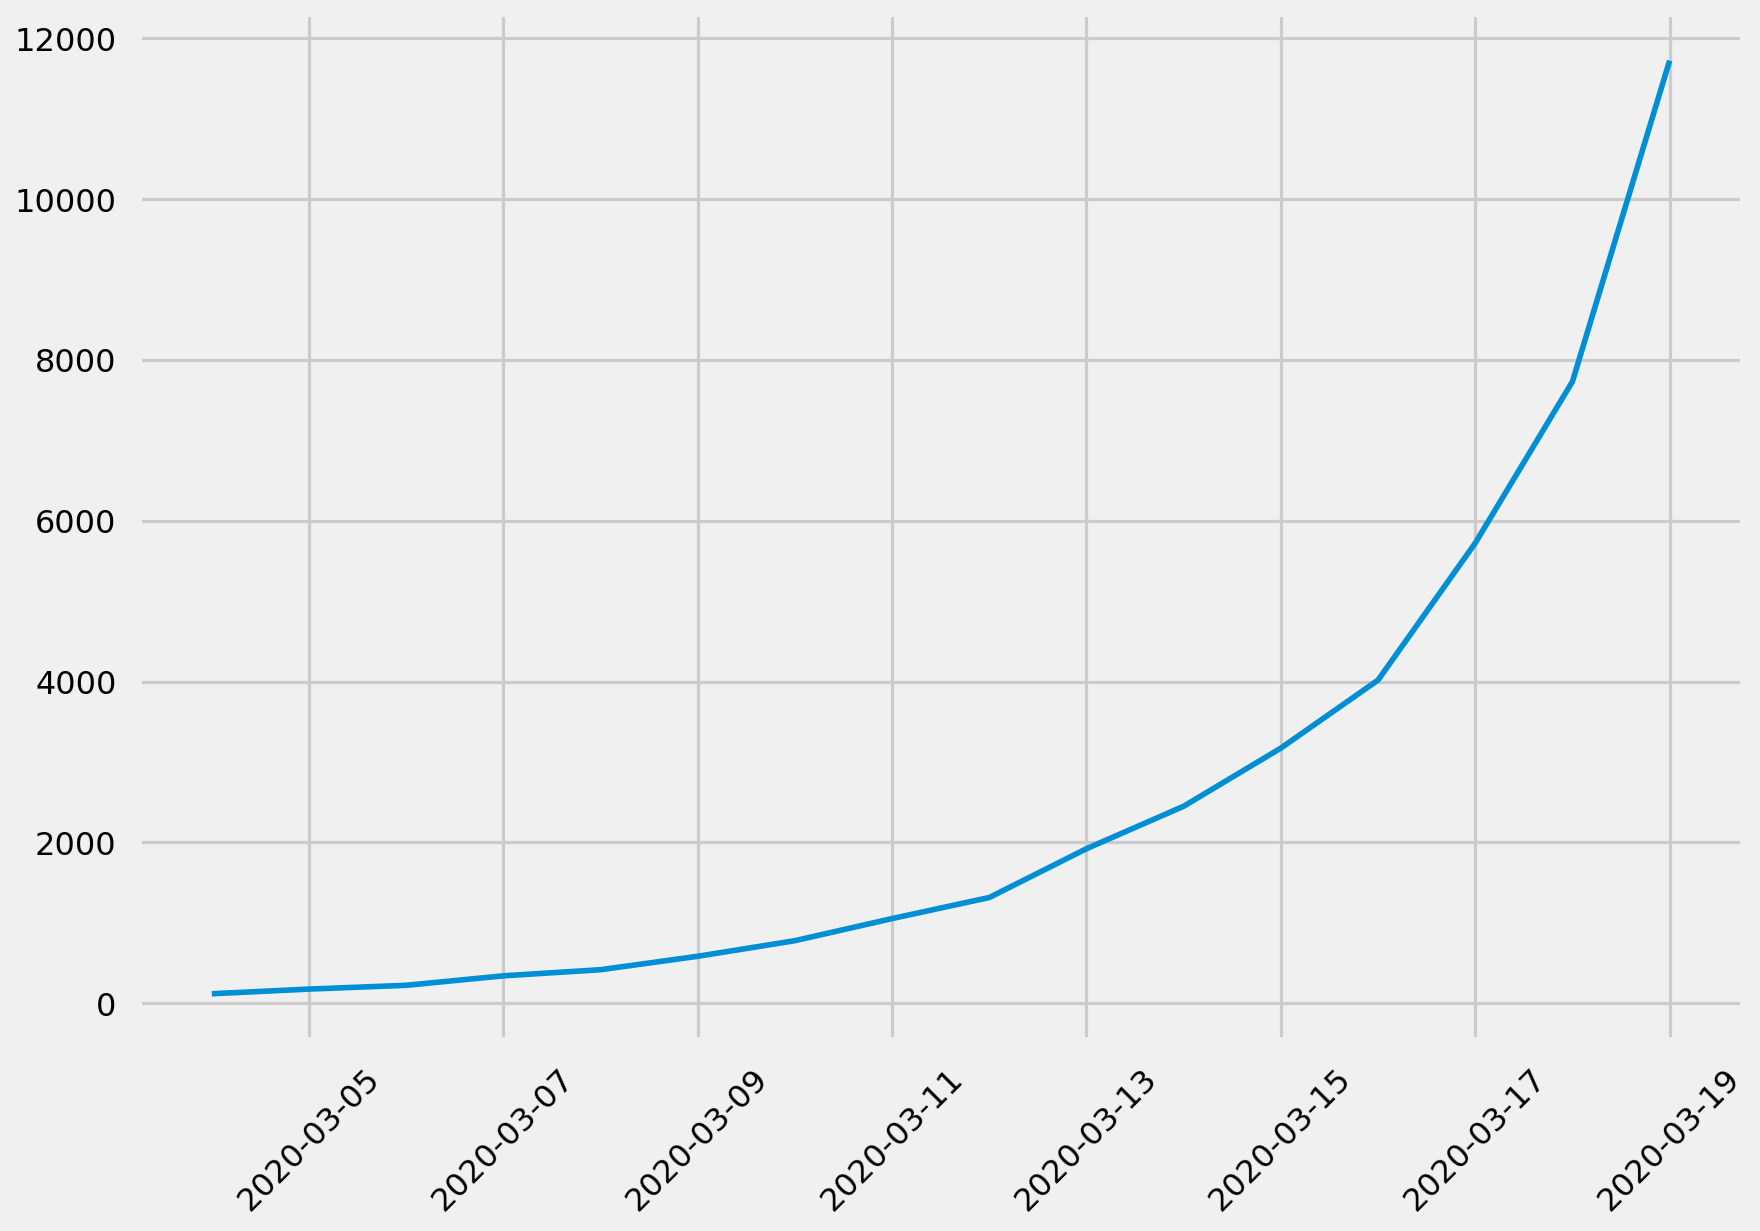

In [11]:
plt.plot(df_us['date'], df_us['positive'])
plt.xticks(rotation=45)

# California Positive Cases

(array([737489., 737491., 737493., 737495., 737497., 737499., 737501.,
        737503.]),
 <a list of 8 Text xticklabel objects>)

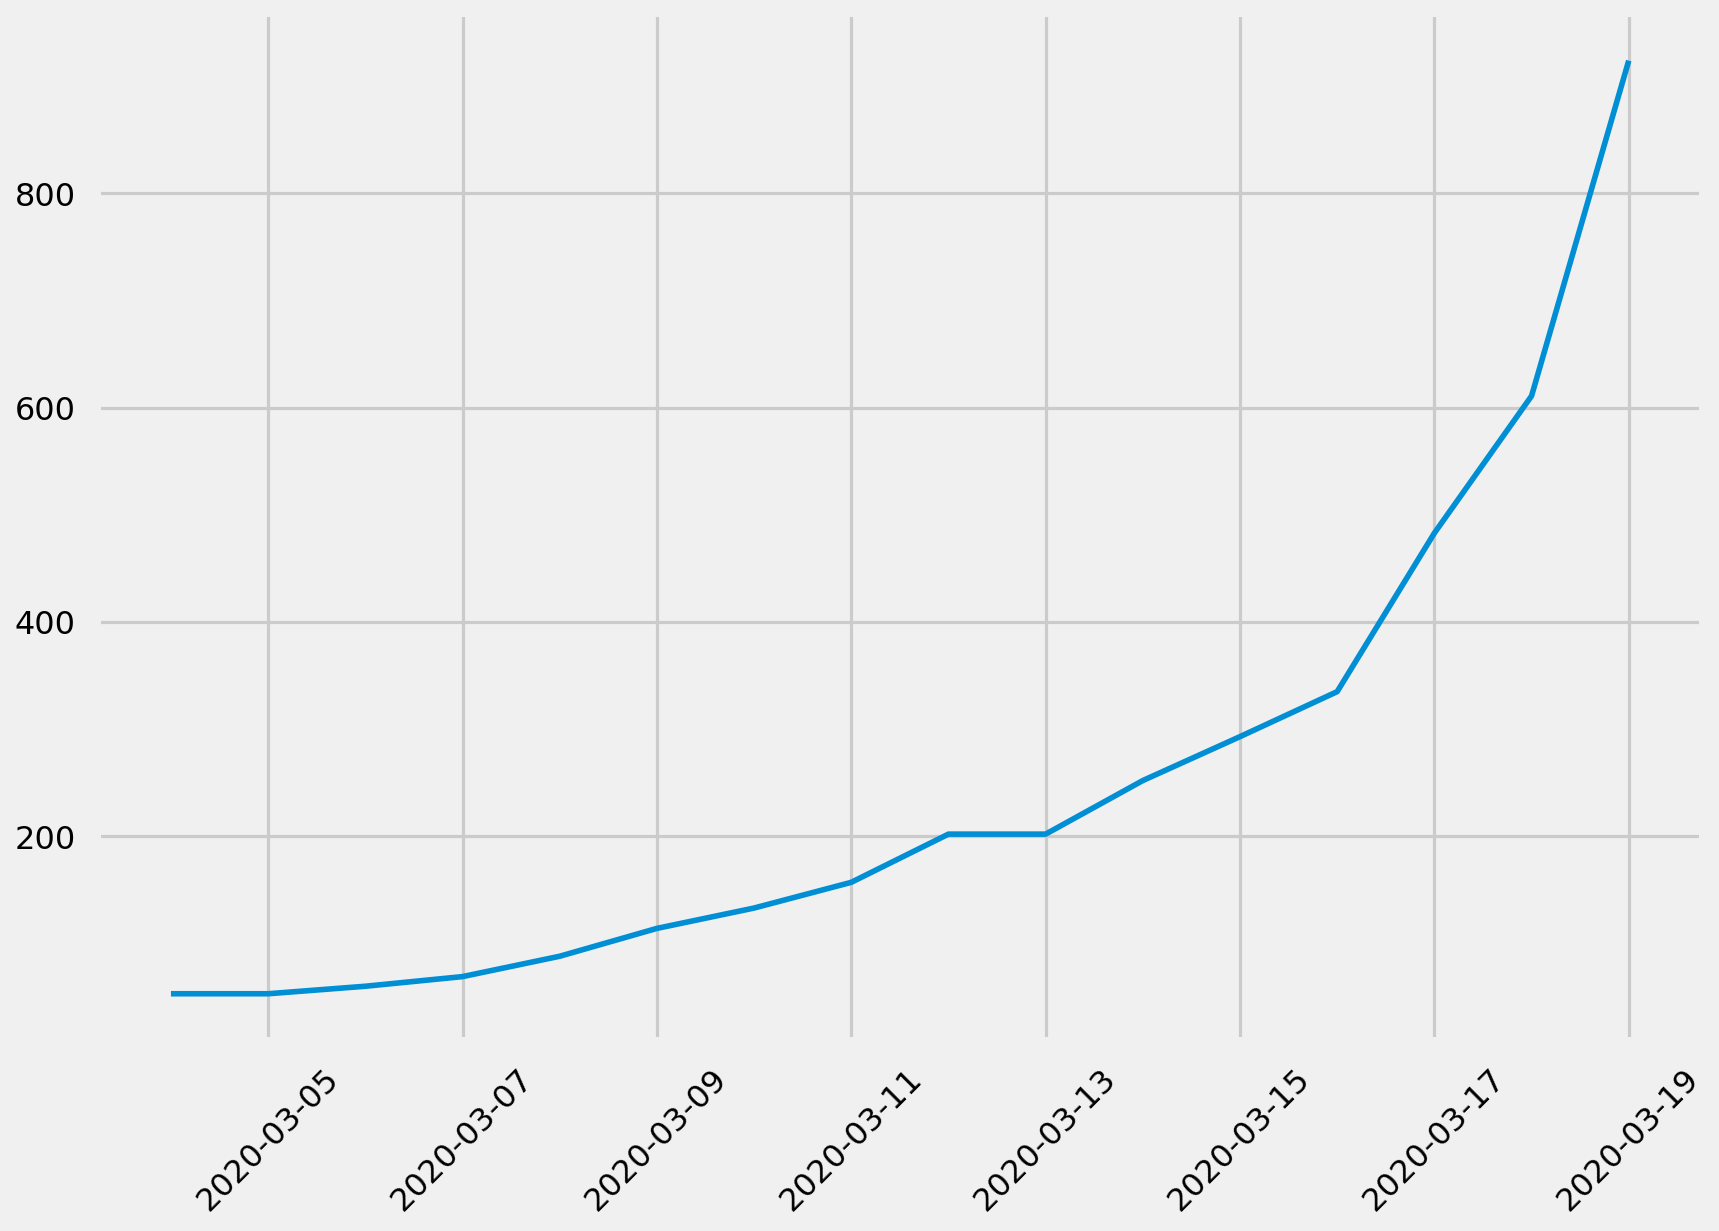

In [12]:
plt.plot(df_states.query('state == "CA"')['date'], df_states.query('state == "CA"')['positive'])
plt.xticks(rotation=45)

# By State Positive Cases

(array([737489., 737491., 737493., 737495., 737497., 737499., 737501.,
        737503.]),
 <a list of 8 Text xticklabel objects>)

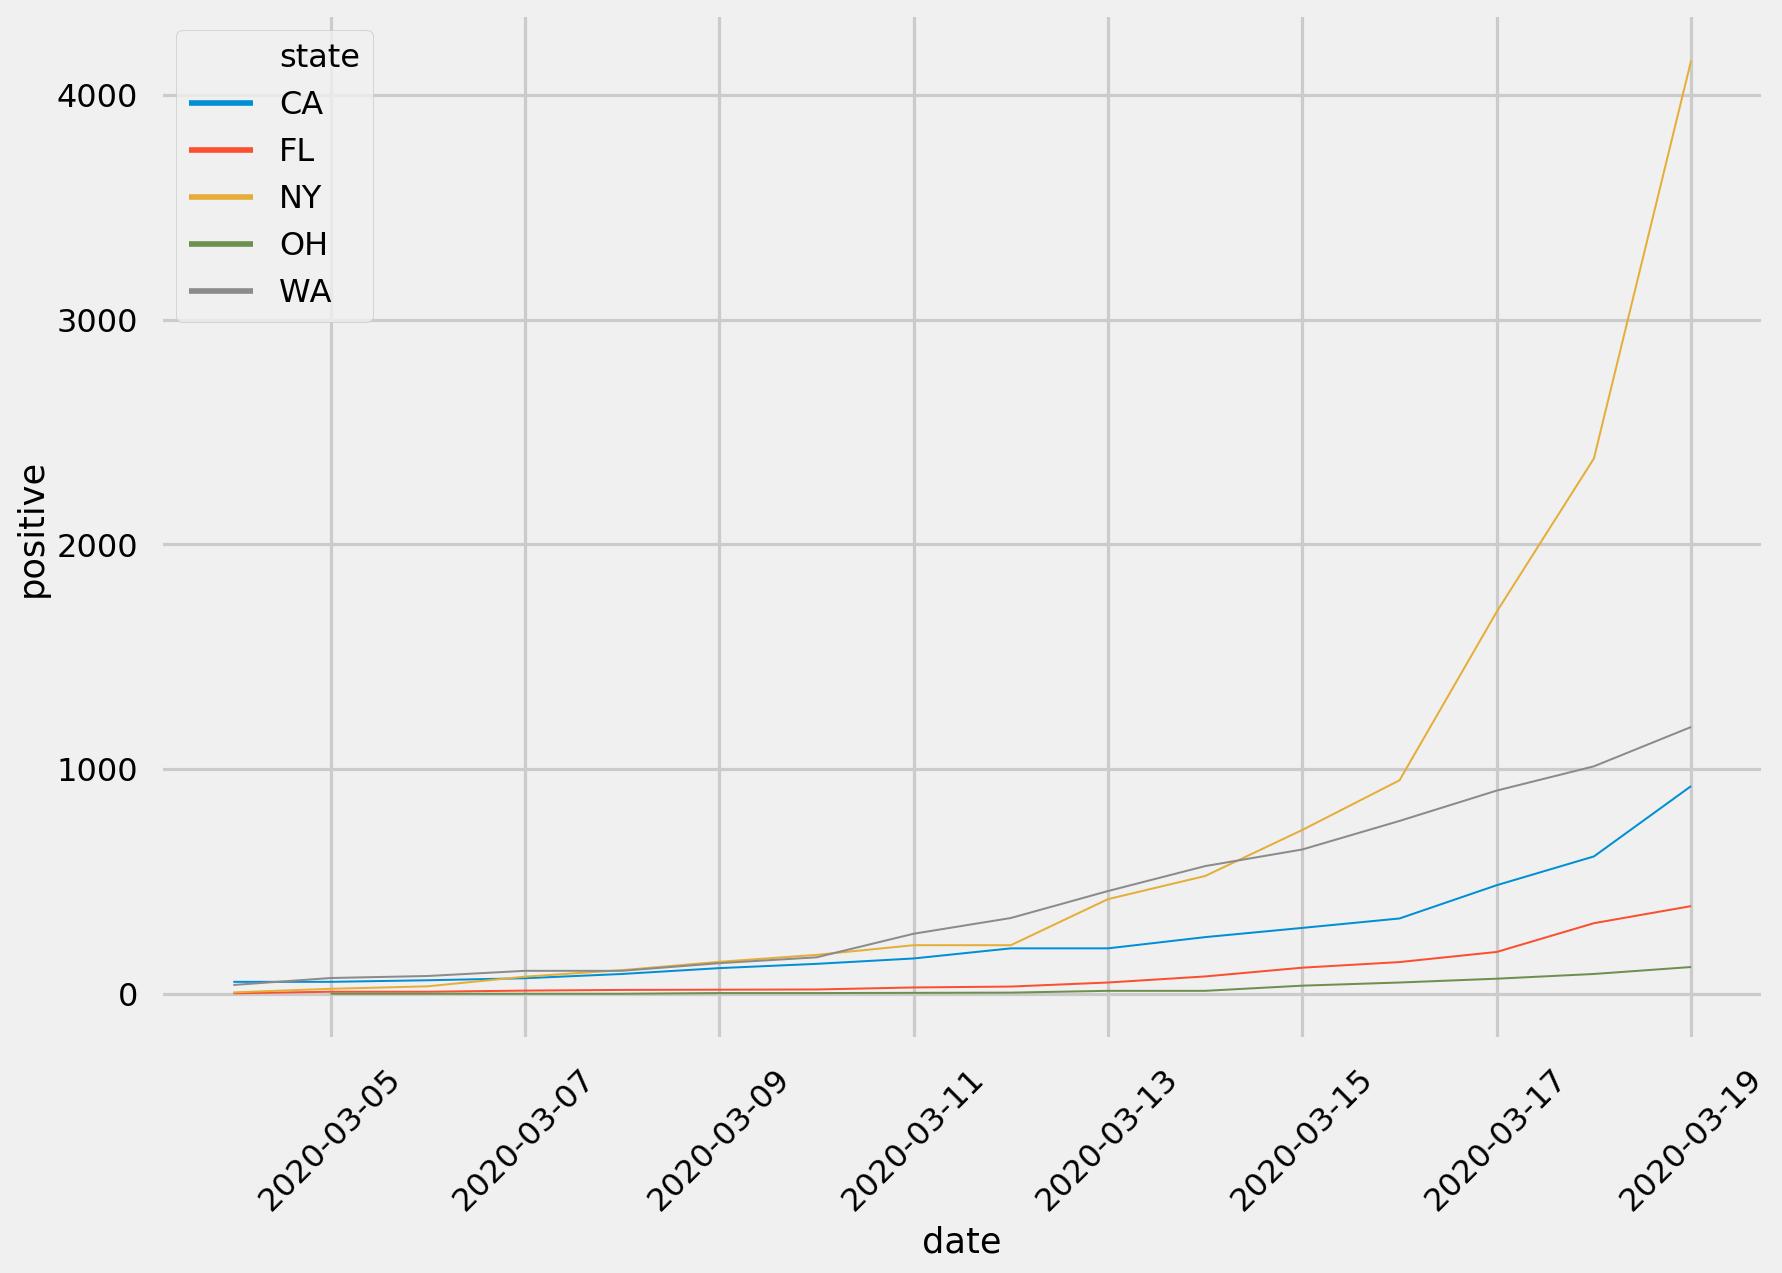

In [13]:
ax = sns.lineplot(x="date", y="positive", hue="state",
                  estimator=None, lw=1,
                  data=df_states.query('state == ["CA", "NY", "FL", "OH", "WA"]'))
plt.xticks(rotation=45)

# By State Positive Cases (Log Scale)

(array([737489., 737491., 737493., 737495., 737497., 737499., 737501.,
        737503.]),
 <a list of 8 Text xticklabel objects>)

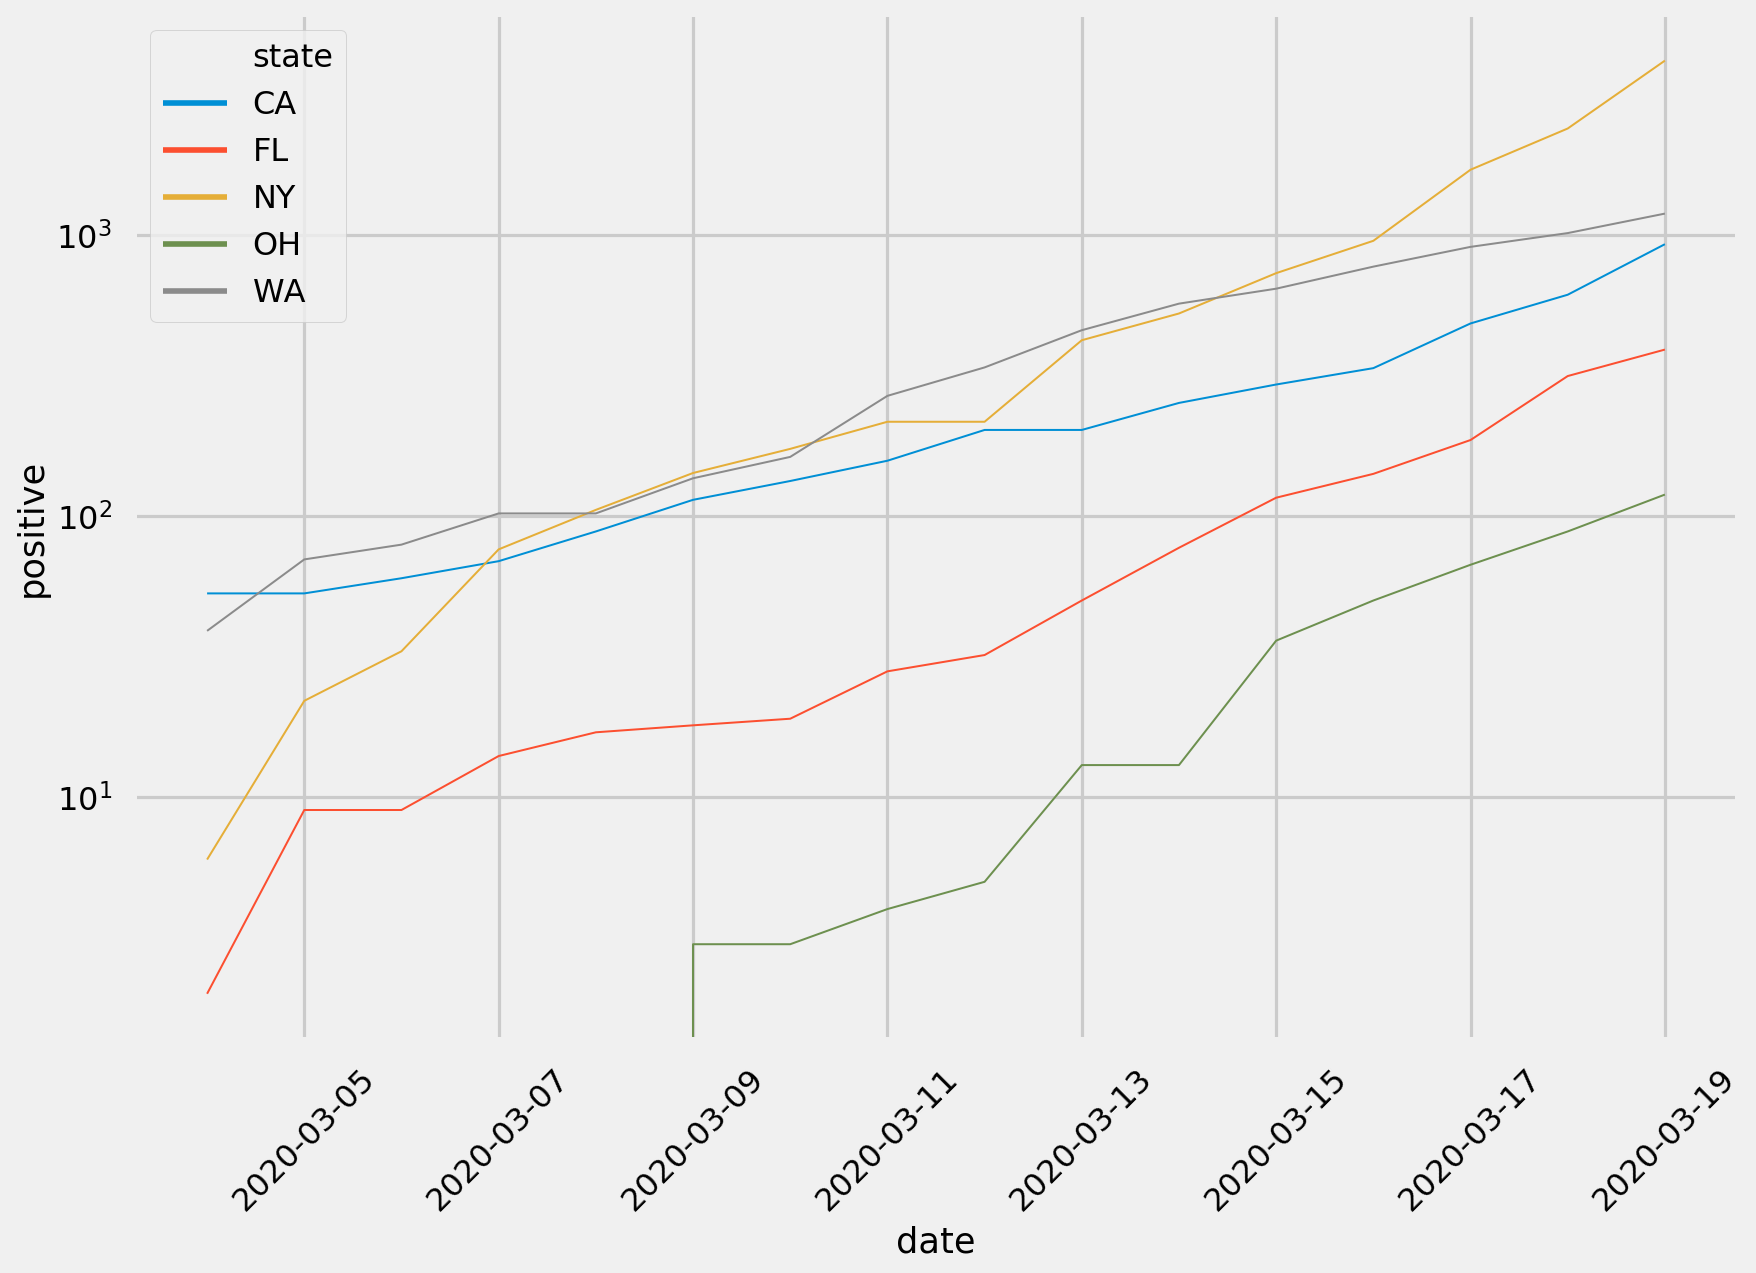

In [14]:
ax = sns.lineplot(x="date", y="positive", hue="state",
                  estimator=None, lw=1,
                  data=df_states.query('state == ["CA", "NY", "FL", "OH", "WA"]'))
ax.set_yscale('log')
plt.xticks(rotation=45)